In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from compute_psycho import emotions_job
from compute_global_dataframes import relaxation_concat_job, oas_concat_job, bmrq_concat_job
import ghibtools as gh
from params import *
from bibliotheque import df_baseline
from configuration import *

# RELAXATION 

In [33]:
metrics = ['Arousal','Relaxation','Relaxation_intensity','Perceived_duration']

clean_label = {'Arousal':'Arousal',
              'Relaxation':'Relaxation',
              'Relaxation_intensity':'Relaxation Intensity',
              'Perceived_duration':'Perceived Duration'}

indexes = ['participant','session']

In [34]:
df = relaxation_concat_job.get(global_key).to_dataframe()
df = df.drop(columns = ['stim_name'])
df[metrics] = df[metrics].astype(float)

In [35]:
df_ratio = df_baseline(df, indexes, metrics)

In [36]:
df

,participant,session,Arousal,Relaxation,Relaxation_intensity,Perceived_duration,stai_state,stai_trait,Gender,Maia_Mean,OAS,BMRQ
dim_0,,,,,,,,,,,,
0,P01,baseline,11.0,10.0,4.0,96.0,40,61,F,1.019643,2.666667,2.727273
1,P01,music,24.0,66.0,61.0,75.0,40,61,F,1.019643,2.666667,2.727273
2,P01,odor,13.0,67.0,61.0,87.0,40,61,F,1.019643,2.666667,2.727273
3,P02,baseline,7.0,93.0,95.0,62.0,24,37,F,3.354762,3.066667,3.000000
4,P02,music,35.0,89.0,91.0,59.0,24,37,F,3.354762,3.066667,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
85,P30,music,86.0,56.0,78.0,55.0,25,29,M,3.071131,2.966667,3.045455
86,P30,odor,36.0,93.0,87.0,59.0,25,29,M,3.071131,2.966667,3.045455
87,P31,baseline,22.0,75.0,67.0,12.0,29,40,M,2.790774,2.933333,2.681818


In [37]:
df_ratio

,participant,session,Arousal,Relaxation,Relaxation_intensity,Perceived_duration
0,P01,odor,1.181818,6.700000,15.250000,0.906250
1,P02,odor,9.142857,0.698925,0.863158,0.500000
2,P03,odor,1.909091,1.151515,1.107692,14.666667
3,P04,odor,2.041667,1.265625,0.957746,1.000000
4,P05,odor,8.500000,0.926316,0.896907,0.767677
5,P06,odor,3.222222,1.261538,1.303030,0.812500
6,P07,odor,5.272727,0.955224,0.840580,1.050000
7,P08,odor,0.928571,0.866667,0.920000,1.520000
8,P09,odor,1.741935,1.365385,1.283019,0.690476
9,P10,odor,23.000000,1.186667,2.827586,0.552632


/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarn

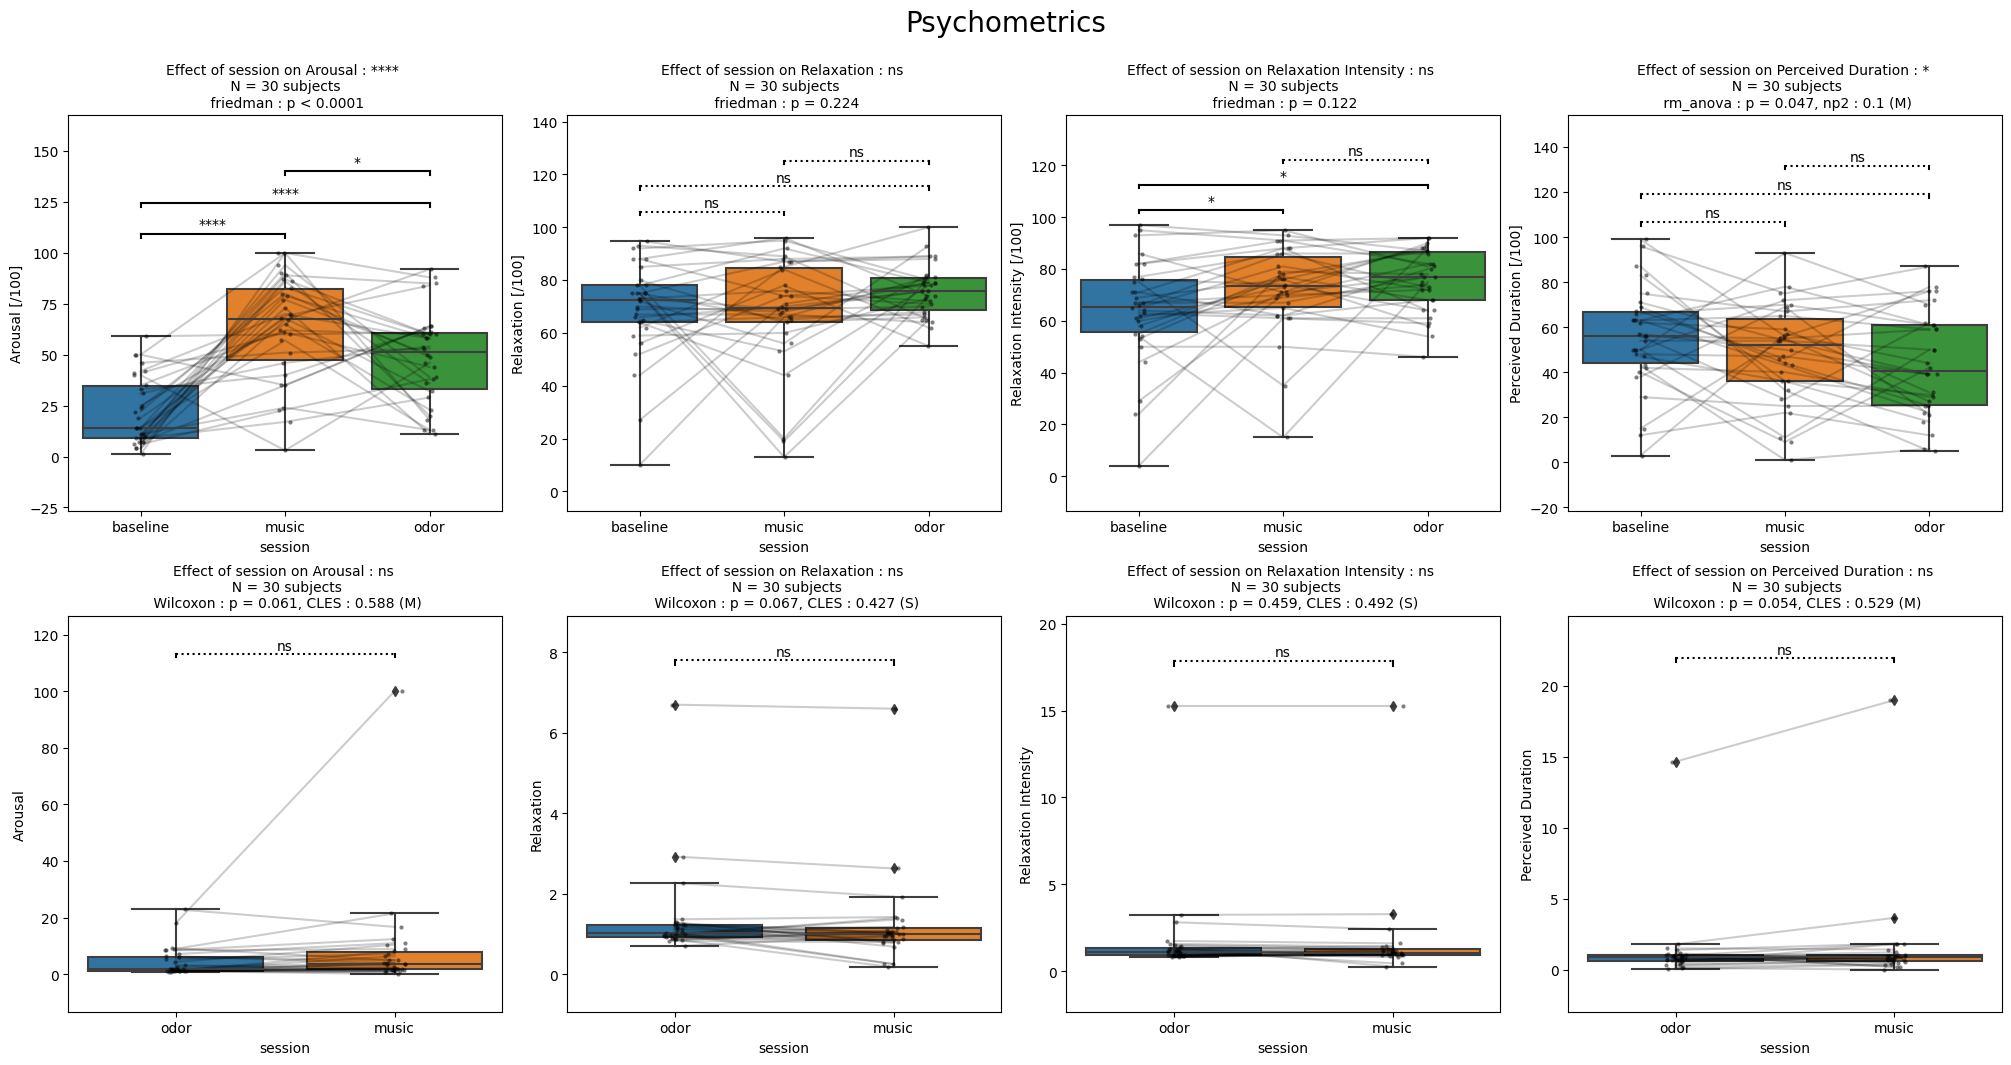

In [38]:
nrows = 2
ncols = 4

fig , axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,10), constrained_layout = True)
fig.suptitle('Psychometrics', y = 1.05 , fontsize = 20)

for i, col in enumerate(metrics):
    ax = axs[0,i]
    gh.auto_stats(df = df, 
                  predictor = 'session', 
                  outcome = col, 
                  design = 'within', 
                  subject = 'participant', 
                  ax=ax, 
                  outcome_clean_label = clean_label[col], 
                  outcome_unit = '/100',
                 strip = True,
                 lines = True,
                 xtick_info = False)
    
    ax = axs[1,i]
    gh.auto_stats(df = df_ratio, 
                  predictor = 'session', 
                  outcome = col, 
                  design = 'within', 
                  subject = 'participant', 
                  ax=ax, 
                  outcome_clean_label = clean_label[col],
                 strip= True,
                 lines = True,
                 xtick_info = False)
 
fig.savefig(base_folder / 'Figures' / 'Psycho' / 'psycho_relaxation.png', bbox_inches = 'tight')

In [39]:
df.columns

Index(['participant', 'session', 'Arousal', 'Relaxation',
       'Relaxation_intensity', 'Perceived_duration', 'stai_state',
       'stai_trait', 'Gender', 'Maia_Mean', 'OAS', 'BMRQ'],
      dtype='object')

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


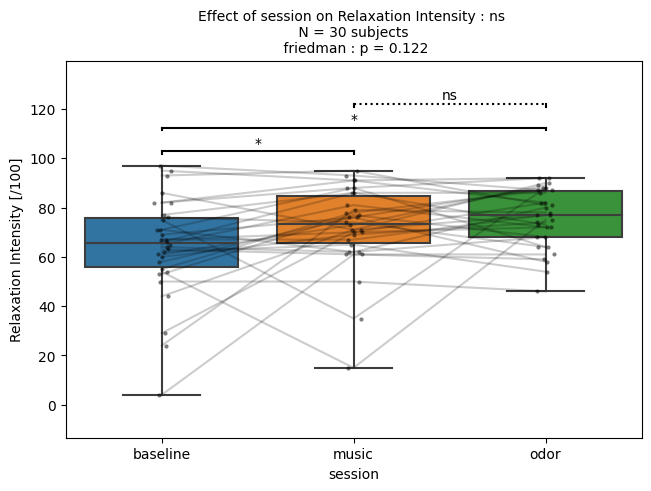

In [40]:

fig , ax = plt.subplots(constrained_layout = True)
gh.auto_stats(df = df, 
              predictor = 'session', 
              outcome = 'Relaxation_intensity', 
              design = 'within', 
              subject = 'participant', 
              ax=ax, 
              outcome_clean_label = 'Relaxation Intensity', 
              outcome_unit = '/100',
             strip = True,
             lines = True,
             xtick_info = False)
 
fig.savefig(base_folder / 'Figures' / 'Psycho' / 'relaxation_intensity_alone.png', bbox_inches = 'tight', dpi = 300)

## FIG SOUTENANCE

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/tmp/ipykernel_68175/3506821202.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = fontsize)


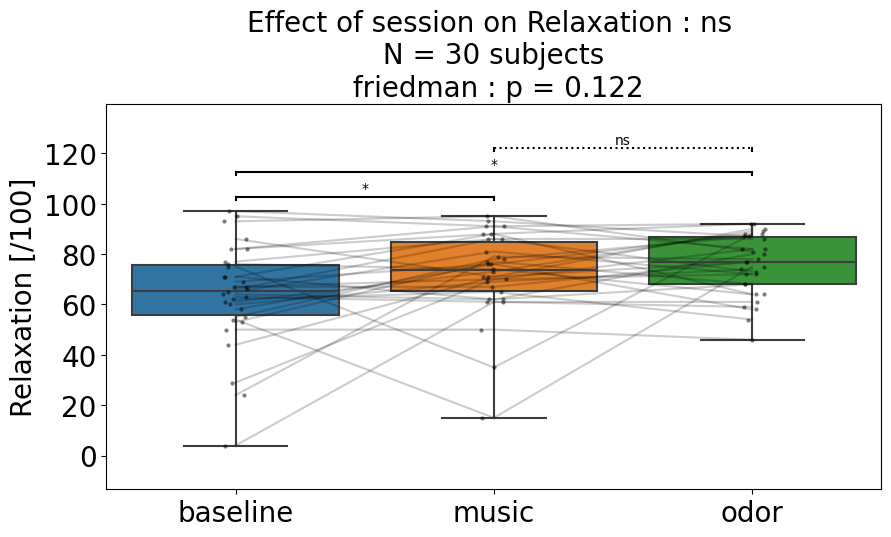

In [41]:
fig , ax = plt.subplots(figsize = (10,5))

fontsize = 20

gh.auto_stats(df = df, 
              predictor = 'session', 
              outcome = 'Relaxation_intensity', 
              design = 'within', 
              subject = 'participant', 
              ax=ax, 
              outcome_clean_label = 'Relaxation', 
              outcome_unit = '/100',
             strip = True,
             lines = True,
             xtick_info = False,
             fontsize = fontsize,)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = fontsize)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = fontsize)
ax.set_xlabel(None)
ax.set_ylabel(ax.get_ylabel(), fontsize=fontsize)

file =  base_cmo / 'users' / 'ValentinGhibaudo' / 'Rédaction_Thèse' / 'Soutenance_Thèse' / 'figures' / 'emosens3_relaxation.png'
fig.savefig(file, bbox_inches = 'tight', dpi = 500)

# SAVE STATS

In [43]:
stats = gh.auto_stats_summary(df = df, predictor = 'session', outcome = 'Relaxation_intensity', design = 'within', subject = 'participant')
file = base_folder / 'Tables' / 'stats_relaxation.xlsx'
gh.save_auto_stats_summary(stats, file)

In [45]:
stats = gh.auto_stats_summary(df = df, predictor = 'session', outcome = 'Arousal', design = 'within', subject = 'participant')
file = base_folder / 'Tables' / 'stats_arousal.xlsx'
gh.save_auto_stats_summary(stats, file)

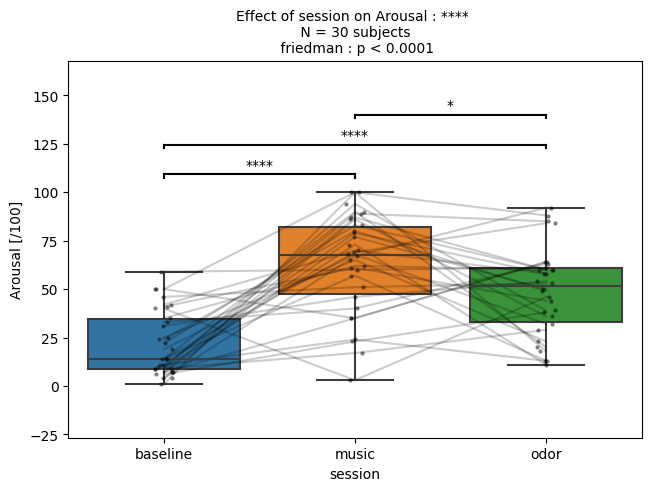

In [11]:

fig , ax = plt.subplots(constrained_layout = True)
gh.auto_stats(df = df, 
              predictor = 'session', 
              outcome = 'Arousal', 
              design = 'within', 
              subject = 'participant', 
              ax=ax, 
              outcome_clean_label = 'Arousal', 
              outcome_unit = '/100',
             strip = True,
             lines = True,
             xtick_info = False)
 
fig.savefig(base_folder / 'Figures' / 'Psycho' / 'arousal_alone.png', bbox_inches = 'tight', dpi = 300)

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


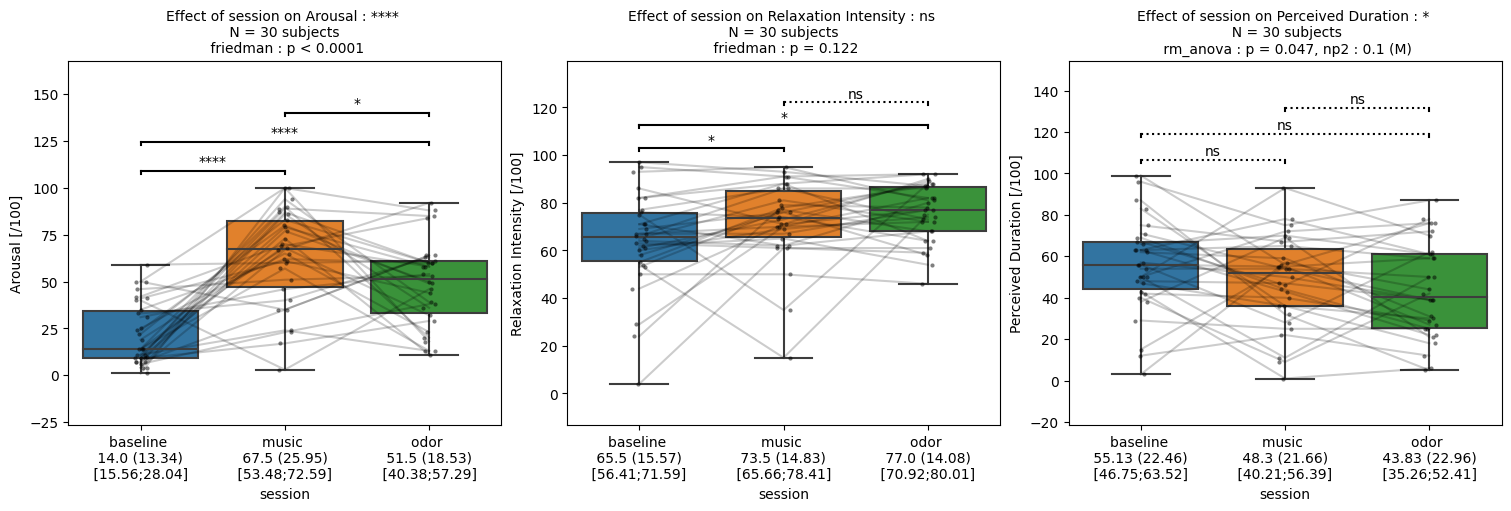

In [12]:
ncols = 3

fig , axs = plt.subplots(ncols = ncols, figsize = (15,5), constrained_layout = True)
# fig.suptitle('Psychometrics', y = 1.06 , fontsize = 20)

for i, col in enumerate(['Arousal','Relaxation_intensity','Perceived_duration']):
    ax = axs[i]
    gh.auto_stats(df = df, 
                  predictor = 'session', 
                  outcome = col, 
                  design = 'within', 
                  subject = 'participant', 
                  ax=ax, 
                  outcome_clean_label = clean_label[col], 
                  outcome_unit = '/100',
                 strip = True,
                 lines = True,
                 xtick_info = True)
    
fig.savefig(base_folder / 'Figures' / 'Psycho' / 'psycho_relaxation_clean.png', bbox_inches = 'tight', dpi = 300)

<AxesSubplot: >

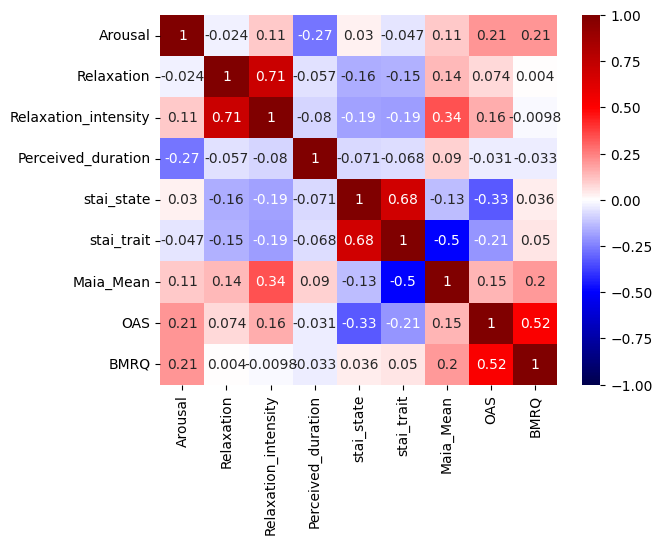

In [13]:
sns.heatmap(df.corr('spearman',numeric_only = True), annot = True, cmap = 'seismic' , vmin = - 1, vmax = 1)

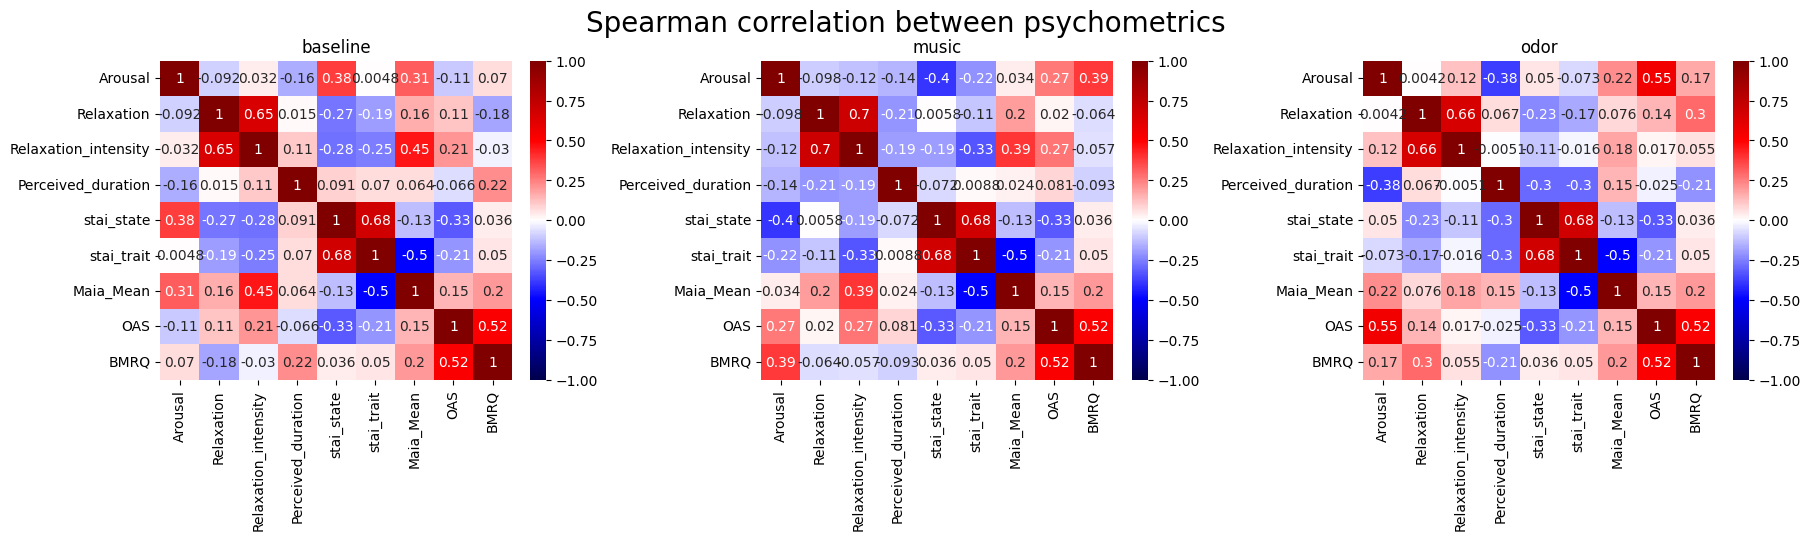

In [14]:
ncols = len(session_keys)

fig, axs = plt.subplots(ncols = ncols, figsize = (18,5), constrained_layout = True)
fig.suptitle('Spearman correlation between psychometrics', fontsize = 20, y = 1.05)

for c, ses in enumerate(session_keys):
    ax = axs[c]
    sns.heatmap(df[df['session'] == ses].corr('spearman',numeric_only = True), annot = True, cmap = 'seismic' , vmin = - 1, vmax = 1, ax=ax)
    ax.set_title(ses)

fig.savefig(base_folder / 'Figures' / 'Psycho' / 'correlation_relaxation.png', bbox_inches = 'tight')

# EMOTIONS

In [15]:
metrics = ['Intensity','Hedonicity','Memories','Irritability','Emotional_Valence','Emotional_Intensity']

clean_label = {'Intensity':'Intensity',
               'Hedonicity':'Hedonicity',
               'Memories':'Memories',
               'Irritability':'Irritability',
               'Emotional_Valence':'Emotional Valence',
               'Emotional_Intensity':'Emotional Intensity'
              }

indexes = ['participant','session']

In [16]:
concat = []
for participant in subject_keys:
    concat.append(emotions_job.get(participant).to_dataframe())
df = pd.concat(concat).reset_index(drop = True)
df[metrics] = df[metrics].astype(float)

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


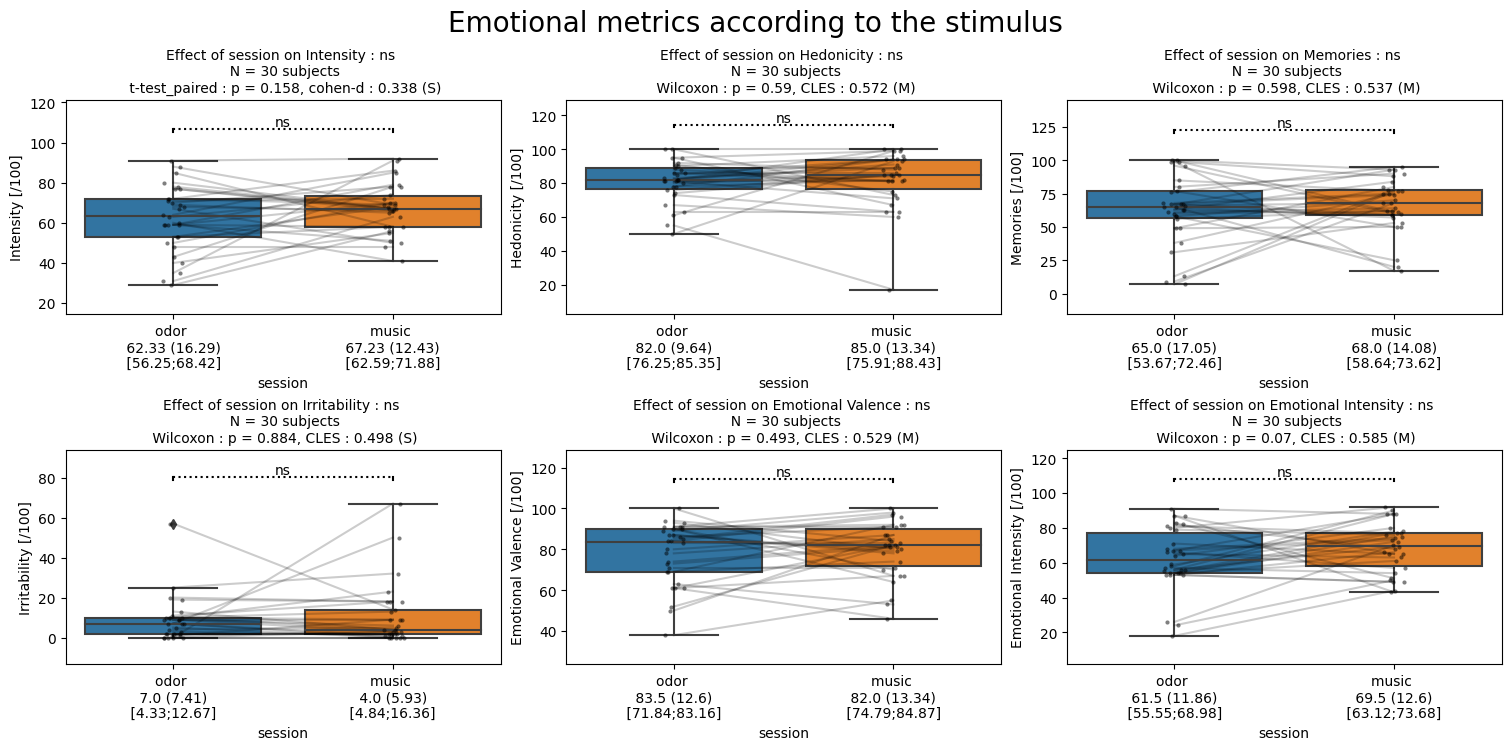

In [17]:
nrows = 2
ncols = 3

array_metrics = np.array(metrics).reshape(nrows, ncols)

fig , axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15,7), constrained_layout = True)
fig.suptitle('Emotional metrics according to the stimulus', y = 1.05 , fontsize = 20)

for r in range(nrows):
    for c in range(ncols):

        ax = axs[r,c]
        metric = array_metrics[r,c]
        gh.auto_stats(df = df, 
                      predictor = 'session', 
                      outcome = metric, 
                      design = 'within', 
                      subject = 'participant', 
                      ax=ax, 
                      outcome_clean_label = clean_label[metric], 
                      outcome_unit = '/100')

fig.savefig(base_folder / 'Figures' / 'Psycho' / 'psycho_emotions.png', bbox_inches = 'tight')

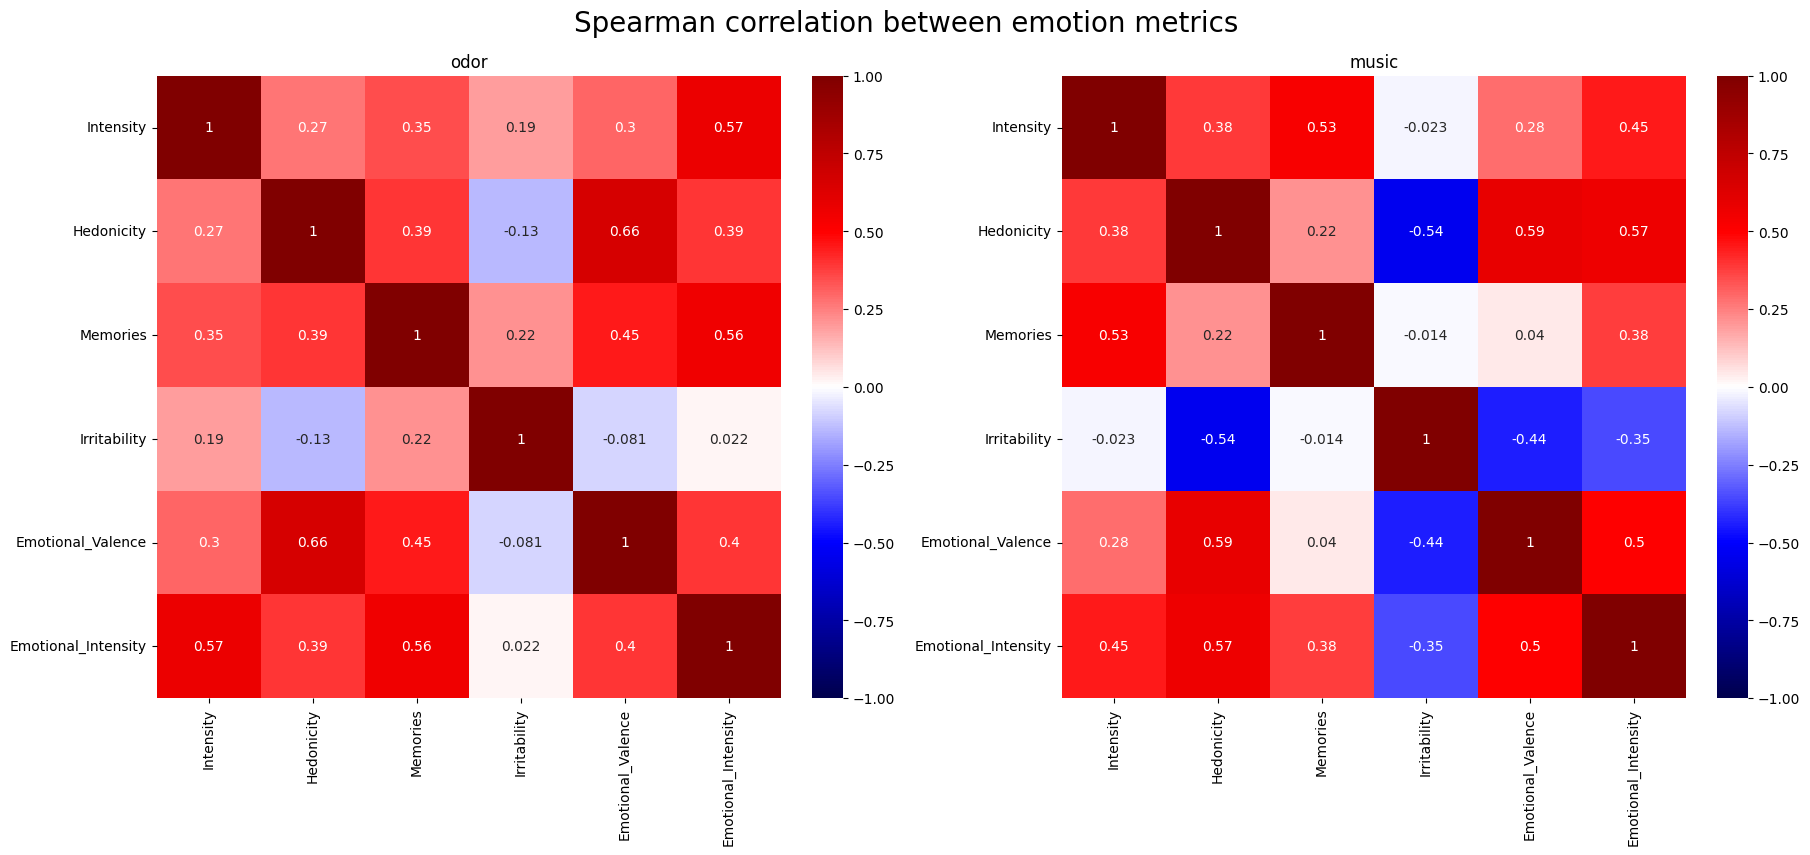

In [18]:
ncols = 2

fig, axs = plt.subplots(ncols = ncols, figsize = (18,8), constrained_layout = True)
fig.suptitle('Spearman correlation between emotion metrics', fontsize = 20, y = 1.05)

for c, ses in enumerate(['odor','music']):
    ax = axs[c]
    sns.heatmap(df[df['session'] == ses].corr('spearman',numeric_only = True), annot = True, cmap = 'seismic' , vmin = - 1, vmax = 1, ax=ax)
    ax.set_title(ses)

fig.savefig(base_folder / 'Figures' / 'Psycho' / 'correlation_emotions.png', bbox_inches = 'tight')

In [19]:
quali = pd.read_excel(base_folder / 'Raw_Data' / 'cotations_qualitatives_stims.xlsx')
quali

,participant,stim,stim_name,Joie,Ennui,Excitation,Sérénité,Tension,Stress,Tristesse,Calme
0,P01,odor,Fleur d'oranger épicé,1,0,0,1,0,0,0,1
1,P01,music,Classique,0,1,0,1,0,0,1,1
2,P02,odor,Vanille,1,0,0,1,0,0,0,0
3,P02,music,Classique,0,1,0,1,0,0,0,1
4,P03,odor,Rose,1,0,0,1,0,0,0,1
5,P03,music,Classique,0,1,0,1,0,0,0,1
6,P04,odor,Vanille,0,0,0,1,0,0,0,1
7,P04,music,Metal,1,0,0,0,0,0,0,0
8,P05,odor,Fleur d'oranger épicé,0,0,0,1,0,0,0,1
9,P05,music,Raga,0,0,0,1,0,0,0,1


/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/statsmodels/stats/proportion.py:1575: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = p1 / p2
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/statsmodels/stats/proportion.py:1576: RuntimeWarning: divide by zero encountered in double_scalars
  odds_ratio = p1 / (1 - p1) / p2 * (1 - p2)
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/statsmodels/stats/proportion.py:1575: RuntimeWarning: invalid value encountered in double_scalars
  ratio = p1 / p2
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/statsmodels/stats/proportion.py:1576: RuntimeWarning: invalid value encountered in double_scalars
  odds_ratio = p1 / (1 - p1) / p2 * (1 - p2)


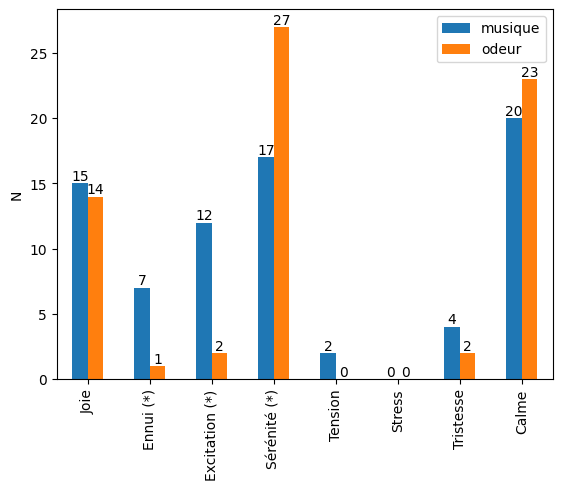

In [20]:
from statsmodels.stats.proportion import test_proportions_2indep, proportions_ztest

nobs = 31

fig, ax = plt.subplots()
df_sum = quali.groupby('stim').sum(True)
df_sum.T.plot.bar(ax=ax)
for bar in ax.containers:
    ax.bar_label(bar)

xticks = []
for q in df_sum.columns:
    values = df_sum[q]
    res =  test_proportions_2indep(count1 = values['music'], nobs1 = nobs, count2 = values['odor'], nobs2 = nobs)
    if res.pvalue < 0.05:
        xticks.append(f'{q} (*)')
    else:
        xticks.append(q)
ax.set_xticklabels(xticks)
ax.legend(labels = ['musique','odeur'])
ax.set_ylabel('N')

fig.savefig(base_folder / 'Figures' / 'Psycho' / 'emotions_qualitatives_stims.png', bbox_inches = 'tight', dpi = 300)

# OAS & BMRQ

In [21]:
oas = oas_concat_job.get(global_key).to_dataframe()
bmrq = bmrq_concat_job.get(global_key).to_dataframe()

In [22]:
both = oas.copy()
both['BMRQ'] = bmrq['BMRQ']

<AxesSubplot: >

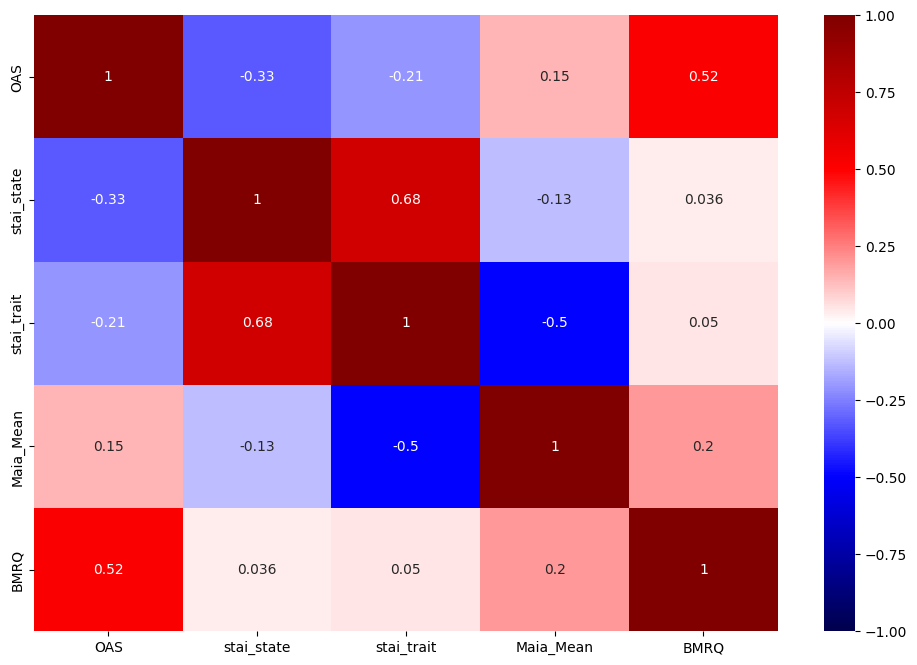

In [23]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(both.corr(method = 'spearman', numeric_only = True), annot = True, cmap = 'seismic', vmin = -1, vmax = 1, ax=ax)

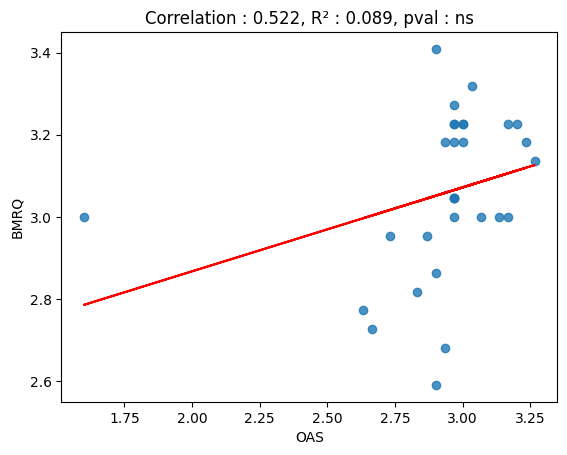

In [24]:
xlabel = 'OAS'
ylabel = 'BMRQ'

fig, ax = plt.subplots()
gh.stats_quantitative(df = both, xlabel = xlabel, ylabel = ylabel, ax=ax)
fig.savefig(base_folder / 'Figures' / 'Psycho' / f'{xlabel}_to_{ylabel}.png')

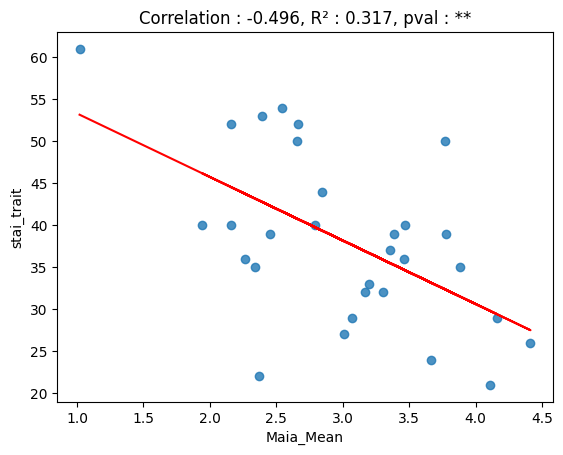

In [25]:
xlabel = 'Maia_Mean'
ylabel = 'stai_trait'

fig, ax = plt.subplots()
gh.stats_quantitative(df = both, xlabel = xlabel, ylabel = ylabel, ax=ax)
fig.savefig(base_folder / 'Figures' / 'Psycho' / f'{xlabel}_to_{ylabel}.png')

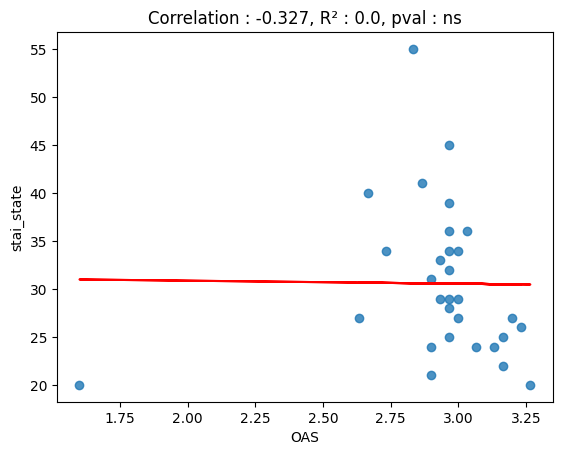

In [26]:
xlabel = 'OAS'
ylabel = 'stai_state'

fig, ax = plt.subplots()
gh.stats_quantitative(df = both, xlabel = xlabel, ylabel = ylabel, ax=ax)
fig.savefig(base_folder / 'Figures' / 'Psycho' / f'{xlabel}_to_{ylabel}.png')

In [27]:
both

,participant,OAS,stai_state,stai_trait,Gender,Maia_Mean,BMRQ
dim_0,,,,,,,
0,P01,2.666667,40,61,F,1.019643,2.727273
1,P02,3.066667,24,37,F,3.354762,3.000000
2,P03,3.266667,20,24,F,3.664583,3.136364
3,P04,3.000000,27,33,F,3.196429,3.227273
4,P05,3.200000,27,21,M,4.107738,3.227273
5,P06,2.966667,29,32,F,3.303869,3.045455
6,P07,3.133333,24,35,F,2.342262,3.000000
7,P08,2.900000,21,22,F,2.367857,2.590909
8,P09,2.833333,55,53,F,2.391667,2.818182


<AxesSubplot: title={'center': 'Effect of Gender on OAS : ns \n N = 16 values/group \n Mann-Whitney : p = 0.721, CLES : 0.46 (S)'}, xlabel='Gender', ylabel='OAS'>

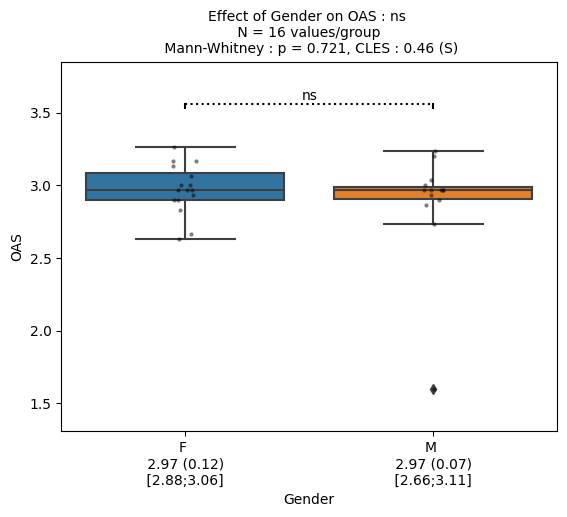

In [28]:
gh.auto_stats(df = both ,predictor = 'Gender', outcome = 'OAS', design = 'between')

<AxesSubplot: title={'center': 'Effect of Gender on BMRQ : ns \n N = 16 values/group \n t-test_ind : p = 0.11, cohen-d : 0.603 (M)'}, xlabel='Gender', ylabel='BMRQ'>

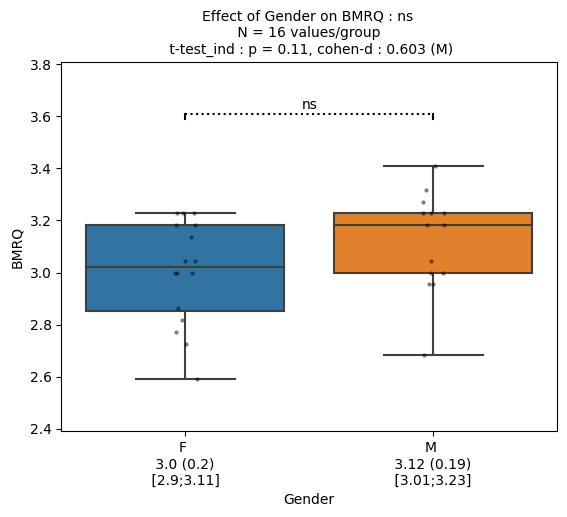

In [29]:
gh.auto_stats(df = both ,predictor = 'Gender', outcome = 'BMRQ', design = 'between')

<AxesSubplot: title={'center': 'Effect of Gender on stai_state : ns \n N = 16 values/group \n Mann-Whitney : p = 0.349, CLES : 0.603 (M)'}, xlabel='Gender', ylabel='stai_state'>

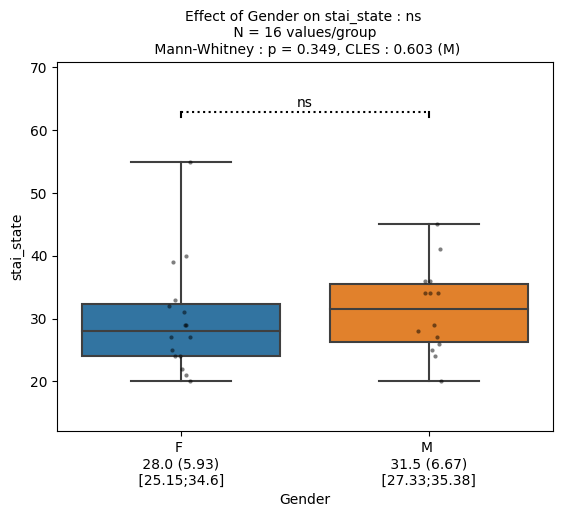

In [30]:
gh.auto_stats(df = both ,predictor = 'Gender', outcome = 'stai_state', design = 'between')

<AxesSubplot: title={'center': 'Effect of Gender on stai_trait : ns \n N = 16 values/group \n t-test_ind : p = 0.64, cohen-d : 0.171 (VS)'}, xlabel='Gender', ylabel='stai_trait'>

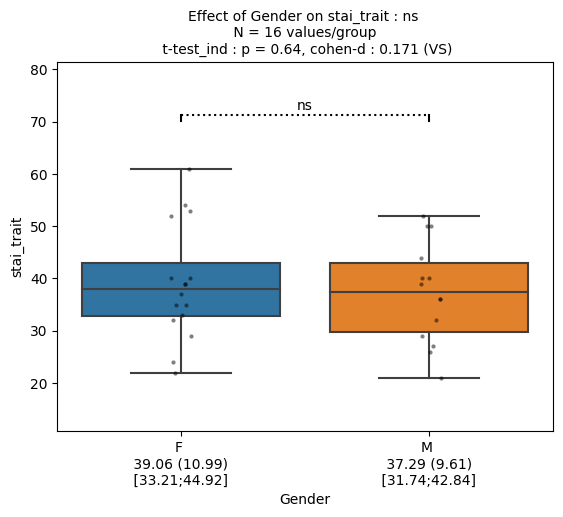

In [31]:
gh.auto_stats(df = both ,predictor = 'Gender', outcome = 'stai_trait', design = 'between')